# <center>YOUTUBE ADVIEW PREDICTION</center>

# **1. Introduction**
### **Objective:** 
To build a machine learning model which will predict youtube adview count based on other youtube metrics.
### **Data Description:**
- train.csv - the training set
- test.csv - the test set
- The file train.csv contains metrics and other details of about 15000 youtube videos. The metrics include number of views, likes, dislikes, comments and apart from that published date, duration and category are also included. The train.csv file also contains the metric number of adviews which is our target variable for prediction.

### **Table of Content:**
1. Introduction
2. Install & Import Libraries
3. Load Datasets
4. Exploratory Data Analysis
5. Feature Engineering
6. Model Development
7. Find Prediction





![Markdown Logo is here.](youtube_ads_img.png)

# **2. Install & Import Libraries**

- Run the below cell, if you've not install these libraries before.

In [2]:
# # use to visualize missing value
# !pip install missingno

# # use for hyper parameter tuning
# !pip install optuna


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

from scipy import stats
from scipy.stats import norm, skew # for some statistics
import warnings # to ignore warning
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import joblib

import warnings
warnings.filterwarnings('ignore')
print("Library Imported!!")

Library Imported!!


# **3. Load Datasets**

In [4]:
# load train and test dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# **4. Exploratory Data Analysis**
### 4.1. Train Data Exploration

For both train and test dataset, We'll explore following things

- First 5 rows
- Data shape
- Data information
- Data types
- Null value

### 4.1.1. First 5 records

In [5]:
train_df.head(100)

vidid  adview    views likes dislikes comment   published duration  \
0   VID_18655      40  1031602  8523      363    1095   9/14/2016  PT7M37S   
1   VID_14135       2     1707    56        2       6   10/1/2016  PT9M30S   
2    VID_2187       1     2023    25        0       2    7/2/2016  PT2M16S   
3   VID_23096       6   620860   777      161     153   7/27/2016  PT4M22S   
4   VID_10175       1      666     1        0       0   6/29/2016    PT31S   
..        ...     ...      ...   ...      ...     ...         ...      ...   
95   VID_5048       1  1208415  2082      202     120  11/10/2010  PT2M41S   
96  VID_16781       1     5993    11        2       1   9/21/2015    PT40S   
97  VID_10543       6  1908671   675      448      71   9/13/2016  PT1M55S   
98  VID_21411     124   609442  6698      349     724   1/31/2016  PT4M11S   
99  VID_21565       1   569870   730       63      69   6/24/2011  PT4M10S   

   category  
0         F  
1         D  
2         C  
3         H  
4         D  
..      ...  
95        D  
96        E  
97        D  
98        G  
99        G  

[100 rows x 9 columns]

### 4.1.2. Data Shape - Train Data

In [6]:
train_df.shape

(14999, 9)

### 4.1.3. Data Information - Train Data

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


### 4.1.4. Statistical analysis - Train Data

In [8]:
train_df.describe(include='all')

vidid        adview  views  likes dislikes comment  published  \
count       14999  1.499900e+04  14999  14999    14999   14999      14999   
unique      14999           NaN  14588   4789     1546    2007       2386   
top     VID_18655           NaN    885      1        0       0  8/26/2016   
freq            1           NaN      4    174     1091    1290         42   
mean          NaN  2.107791e+03    NaN    NaN      NaN     NaN        NaN   
std           NaN  5.237711e+04    NaN    NaN      NaN     NaN        NaN   
min           NaN  1.000000e+00    NaN    NaN      NaN     NaN        NaN   
25%           NaN  1.000000e+00    NaN    NaN      NaN     NaN        NaN   
50%           NaN  2.000000e+00    NaN    NaN      NaN     NaN        NaN   
75%           NaN  6.000000e+00    NaN    NaN      NaN     NaN        NaN   
max           NaN  5.429665e+06    NaN    NaN      NaN     NaN        NaN   

       duration category  
count     14999    14999  
unique     3146        8  
top       PT31S        D  
freq        147     7558  
mean        NaN      NaN  
std         NaN      NaN  
min         NaN      NaN  
25%         NaN      NaN  
50%         NaN      NaN  
75%         NaN      NaN  
max         NaN      NaN

### 4.1.5. Data Type - Train Data

In [9]:
train_dtype = train_df.dtypes
train_dtype.value_counts()

object    8
int64     1
Name: count, dtype: int64

### 4.1.6. Null Value - Train Data

In [10]:
train_df.isnull().sum().sort_values(ascending = False).head(10)

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

### 4.1.7. Visualize missing value using **Misingno** - Train Data

<Axes: >

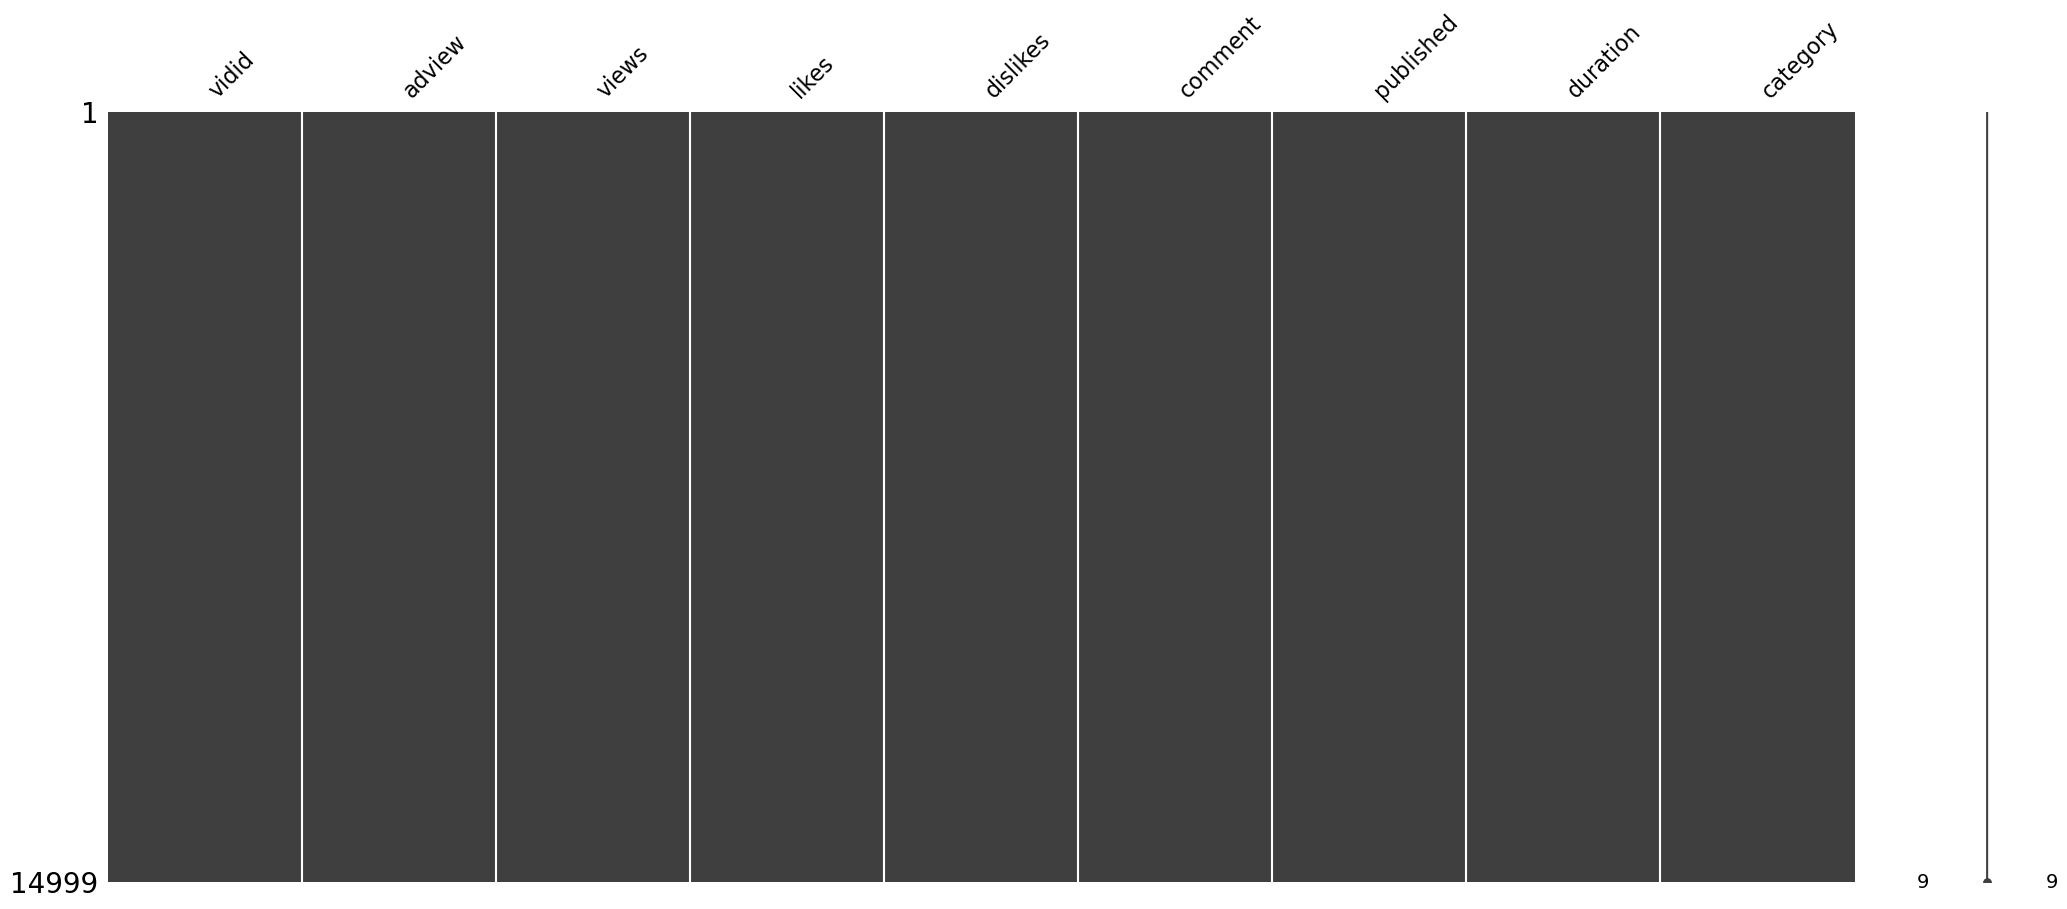

In [11]:
msno.matrix(train_df)

### 4.2. Test Data Exploration

### 4.2.1. First 5 rows - Test Data

In [12]:
test_df.head()

vidid    views likes dislikes comment   published  duration category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S        B
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S        F
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S        D
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S        G
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S        B

### 4.2.2. Data Shape - Test Data

In [13]:
test_df.shape

(8764, 8)

### 4.2.3. Data Type - Test Data

In [14]:
test_dtype = test_df.dtypes
test_dtype.value_counts()

object    8
Name: count, dtype: int64

### 4.2.4. Data Information - Test Data

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


### 4.2.5. Statistical analysis - Test Data

In [16]:
test_df.describe(include='all')

vidid views likes dislikes comment   published duration category
count       8764  8764  8764     8764    8764        8764     8764     8764
unique      8764  8605  3434     1215    1556        2109     2330        8
top     VID_1054   688     2        0       0  2016-08-26    PT31S        D
freq           1     3    89      662     727          32      120     4419

### 4.2.6. Null Data - Test Data

In [17]:
test_df.isnull().sum().sort_values(ascending = False).head(10)

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

### 4.2.7. Visualize missing value using **Misingno** - Test Data

<Axes: >

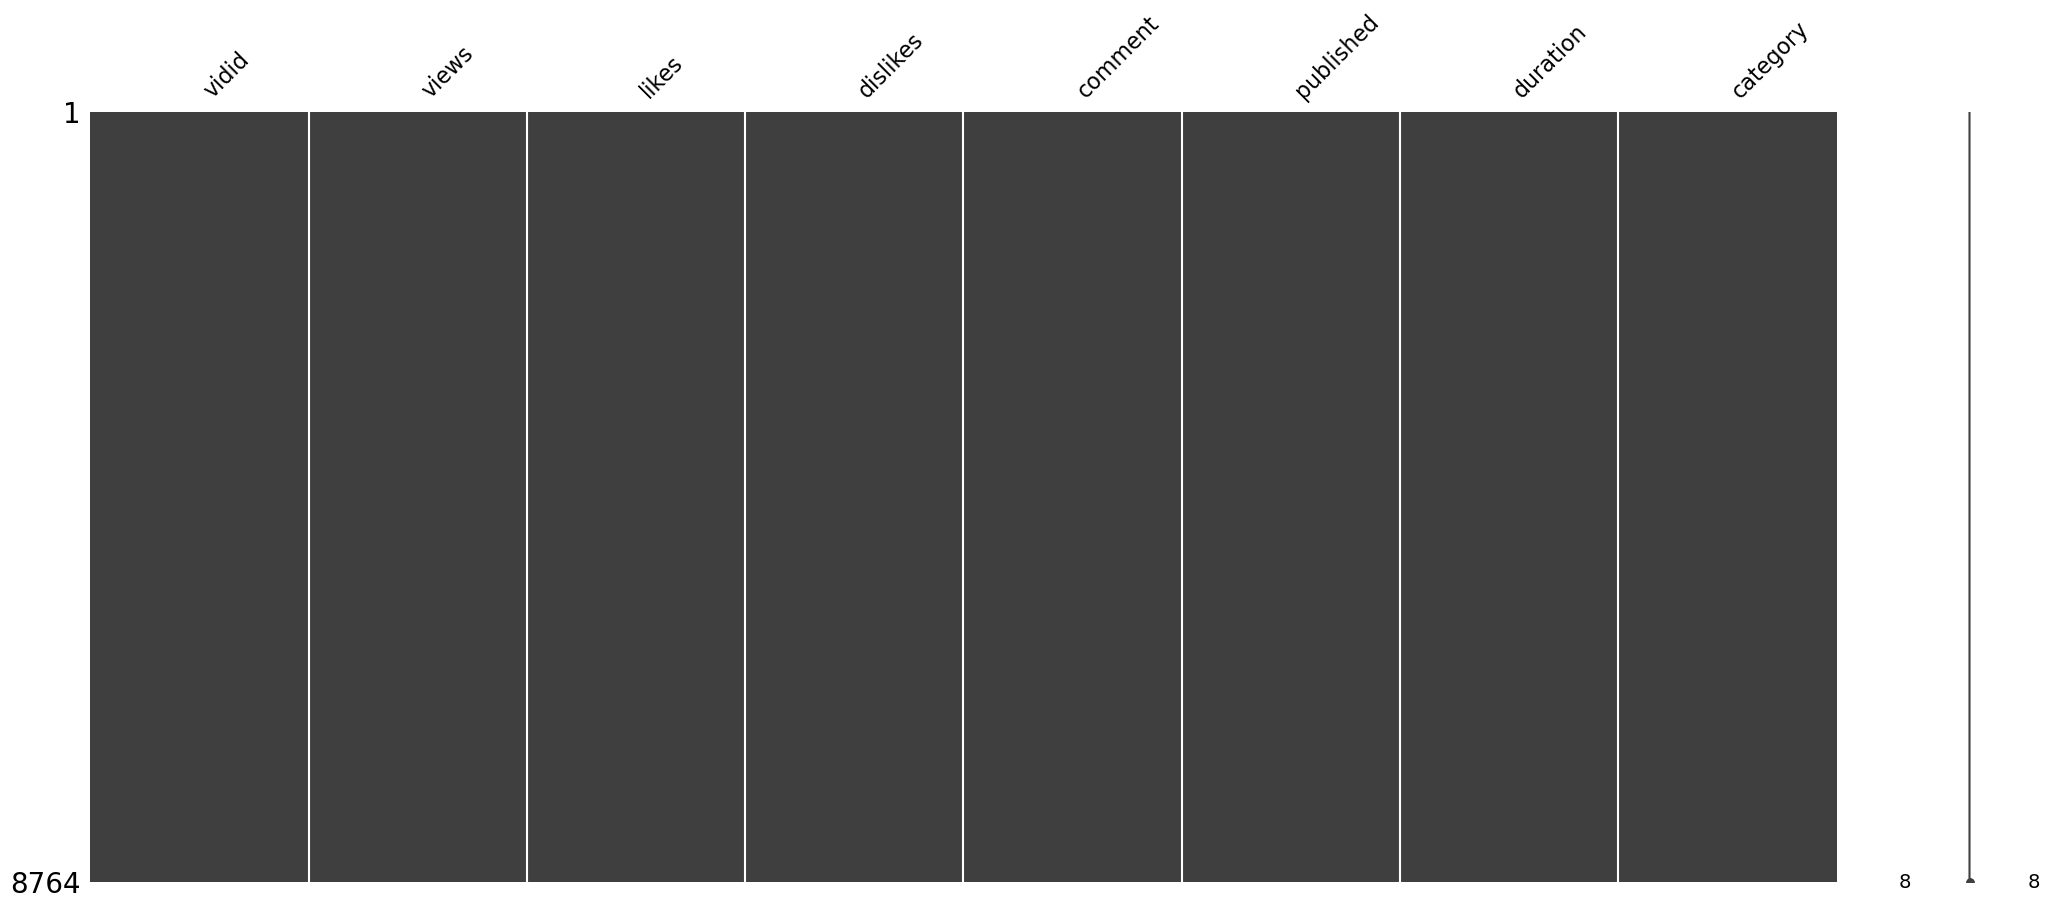

In [18]:
msno.matrix(test_df)

### 4.2.8. Report - Data Exploration
- The shape of train and test datasets are (14999, 9) & (8764, 8)
- There is no null value present in both dataset.
- Some categorical columns should convert to numerical.
- e.g 'views', 'likes', 'dislikes', 'comment'.


### 4.3. Train & Test Data Comparison

Here we'll compare below things between train and test dataset.
- Data Type
- Null values
- Data Distribution

### 4.3.1. Data Type Comparison

In [19]:
# as 'SalePrice' Column is not available in test dataset. So we'll delete it.
trn_dtype = train_dtype.drop('adview')
trn_dtype.compare(test_dtype)

Empty DataFrame
Columns: [self, other]
Index: []

- The data type of each columns is same in both train and test dataframe

### 4.3.2. Null Value Comparison

In [20]:
null_train = train_df.isnull().sum()
null_test = test_df.isnull().sum()
null_train = null_train.drop('adview')
null_comp_df = null_train.compare(null_test).sort_values(['self'],ascending = [False])
null_comp_df  

Empty DataFrame
Columns: [self, other]
Index: []

- Here we can see that there is no null value present in test and train dataset.

### 4.3.3. Distribution Comparison
Before going for distribution comparison,let's do some data preprocessing which will help in data analysis.

### 4.3.3.1 Convert Categorical column to numerical

In [21]:
convert_col = ['views', 'likes', 'dislikes', 'comment']
# these columns contain 'F' letter. So replace it by '0'. As we are converting columns to numerical.
for col in convert_col:
  train_df[col].replace({"F": 0}, inplace=True)
  test_df[col].replace({"F": 0}, inplace=True)


# Convert "categorical" feature to "numerical"
for col in convert_col:
  train_df[col] = train_df[col].astype('int')
  test_df[col] = test_df[col].astype('int')

### 4.3.3.2. Temporal variable analysis

In [22]:
train_df.head()

vidid  adview    views  likes  dislikes  comment  published duration  \
0  VID_18655      40  1031602   8523       363     1095  9/14/2016  PT7M37S   
1  VID_14135       2     1707     56         2        6  10/1/2016  PT9M30S   
2   VID_2187       1     2023     25         0        2   7/2/2016  PT2M16S   
3  VID_23096       6   620860    777       161      153  7/27/2016  PT4M22S   
4  VID_10175       1      666      1         0        0  6/29/2016    PT31S   

  category  
0        F  
1        D  
2        C  
3        H  
4        D

In [23]:
# convert "duration" column format into "second" format
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train_mp = train_df["duration"]
test_mp = test_df["duration"]

train_time = train_mp.apply(checki)
test_time = test_mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(":")
    return int(h) * 3600 + int(m) * 60 + int(s)

train_time=train_time.apply(func_sec)
test_time=test_time.apply(func_sec)

train_df["duration"]=train_time
test_df["duration"]=test_time
# train_df.head()

### 4.3.3.3. Convert 'date' to 'year' format in 'published' column

In [24]:
train_df['published'] = pd.DatetimeIndex(train_df['published']).year
test_df['published'] = pd.DatetimeIndex(test_df['published']).year

# convert to numerical feature
train_df['published'] = train_df['published'].astype('int')
test_df['published'] = test_df['published'].astype('int')

In [25]:
train_df.head()

vidid  adview    views  likes  dislikes  comment  published  duration  \
0  VID_18655      40  1031602   8523       363     1095       2016       457   
1  VID_14135       2     1707     56         2        6       2016       570   
2   VID_2187       1     2023     25         0        2       2016       136   
3  VID_23096       6   620860    777       161      153       2016       262   
4  VID_10175       1      666      1         0        0       2016        31   

  category  
0        F  
1        D  
2        C  
3        H  
4        D

In [26]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(train_df[col].unique()) < 10 and col not in ['vidid']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['vidid']]
categorical_features = [col for col in train_df.columns if train_df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of categorical features : ",len(categorical_features))

Total Number of Numerical Columns :  7
Number of discrete features :  0
No of continuous features are :  7
Number of categorical features :  2


### 4.3.3.4. Concat Train and Test datasets

In [27]:
# combined train and test datasets
combined_df = pd.concat([train_df,test_df],axis=0)

combined_df["Label"] = "test"
combined_df["Label"][:14999] = "train"

### 4.3.4. Distribution Comparison - Continuous

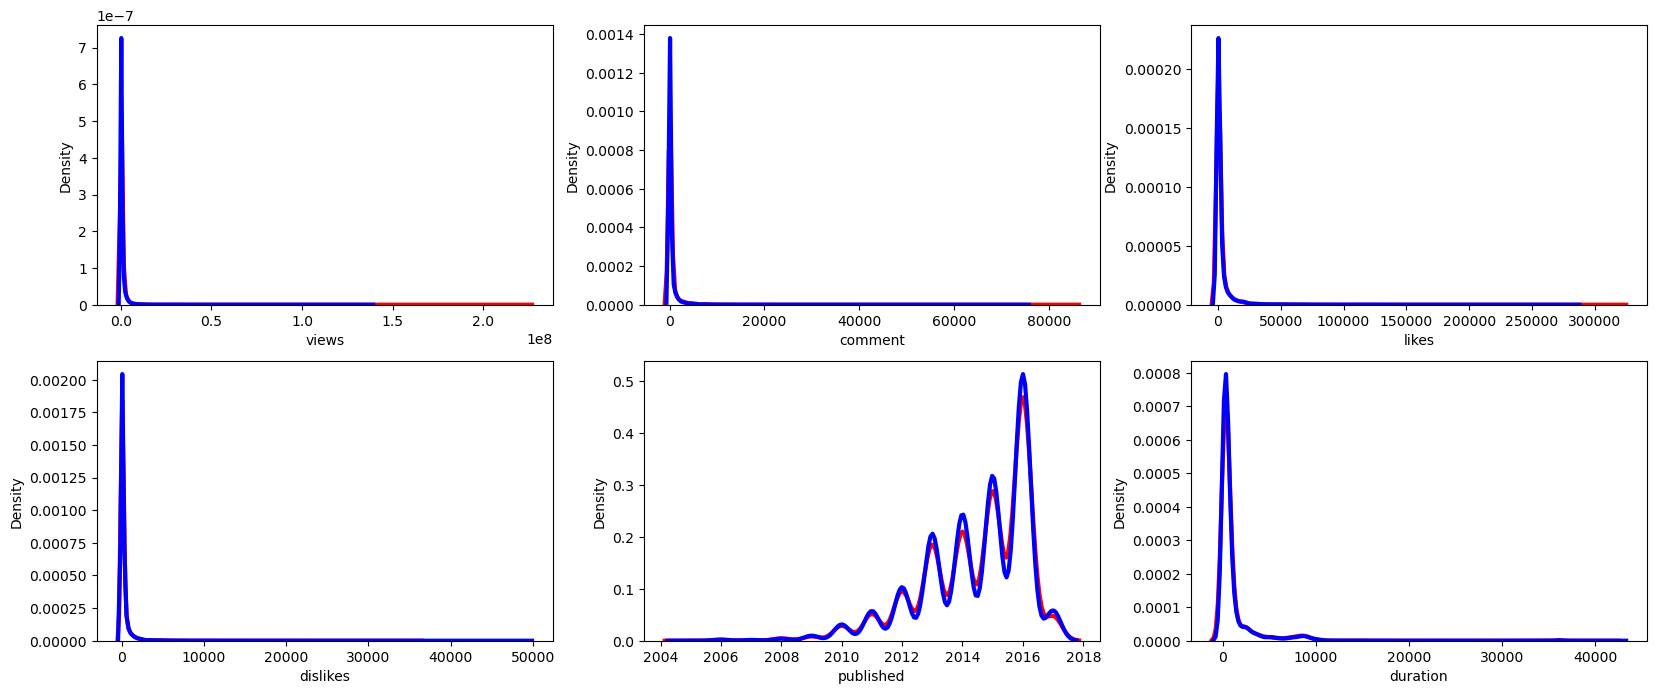

In [28]:
plt.figure(figsize=(20, 8))
continuous_features = ['views', 'comment', 'likes', 'dislikes','published', 'duration']
pos = 1
for i, feature in enumerate(continuous_features):
  plt.subplot(2 , 3 , pos)
  sns.distplot(test_df[feature], hist = False, kde = True, kde_kws = {'linewidth': 3},color='r' )
  sns.distplot(train_df[feature], hist = False, kde = True, kde_kws = {'linewidth': 3} ,color='b')
  pos = pos + 1


Above distribution shows that:
- The distribution of train and test data are similar for most continous features.
- All distributions are not **normally distributed**.

### 4.3.5. Linearity Check
Here we'll see the linearity between all features and the target variable.

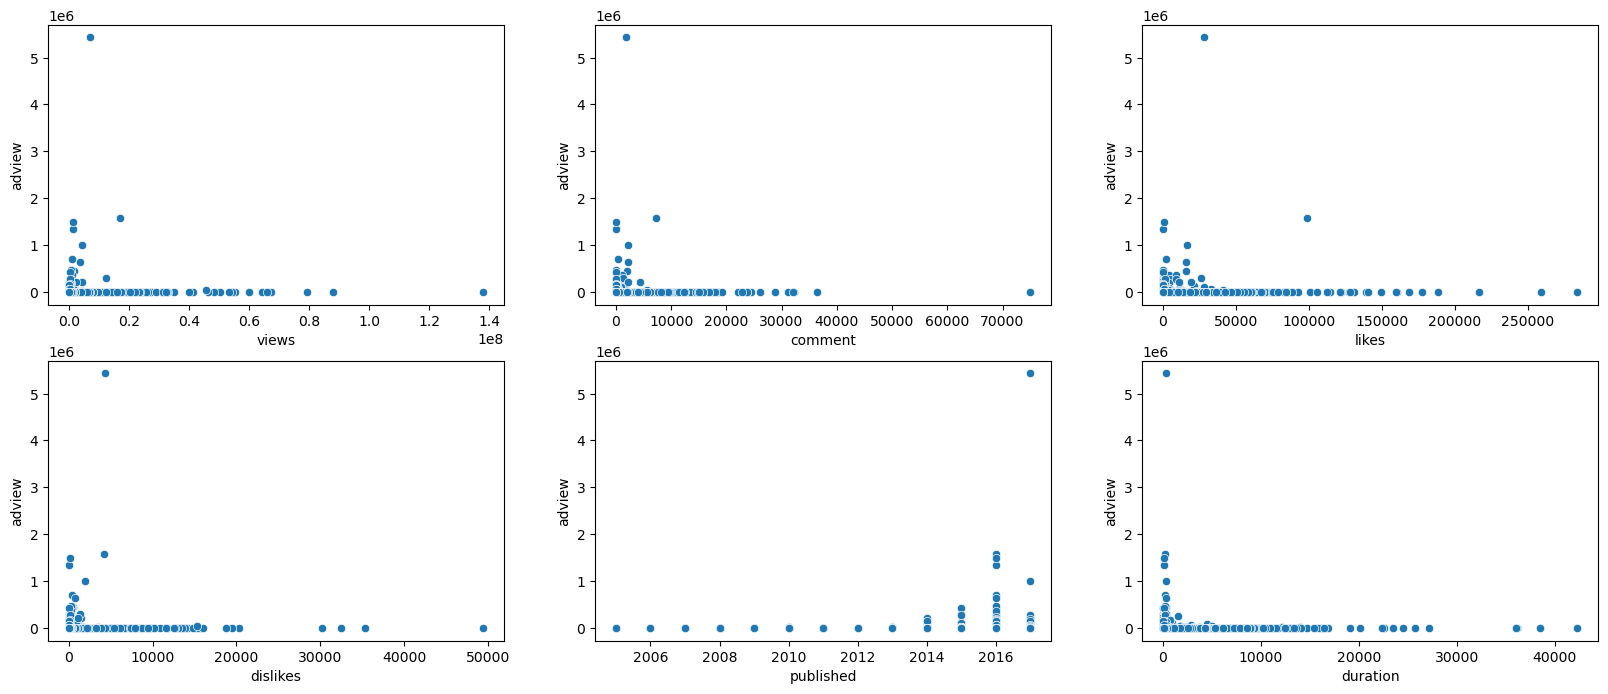

In [29]:
plt.figure(figsize=(20, 8))
pos = 1
for i, feature in enumerate(continuous_features):
  plt.subplot(2 , 3 , pos)
  sns.scatterplot(data=combined_df, x = feature, y= "adview")
  pos = pos + 1


### 4.3.6. Distribution Comparison - Categorical 
- There are two categorical features. These are **"category", "vidid"**.
- **"vidid"** is the id of video. So it has no impact to target variable.
- So we'll only check the distribution of **"category"** column.

<Axes: xlabel='category', ylabel='count'>

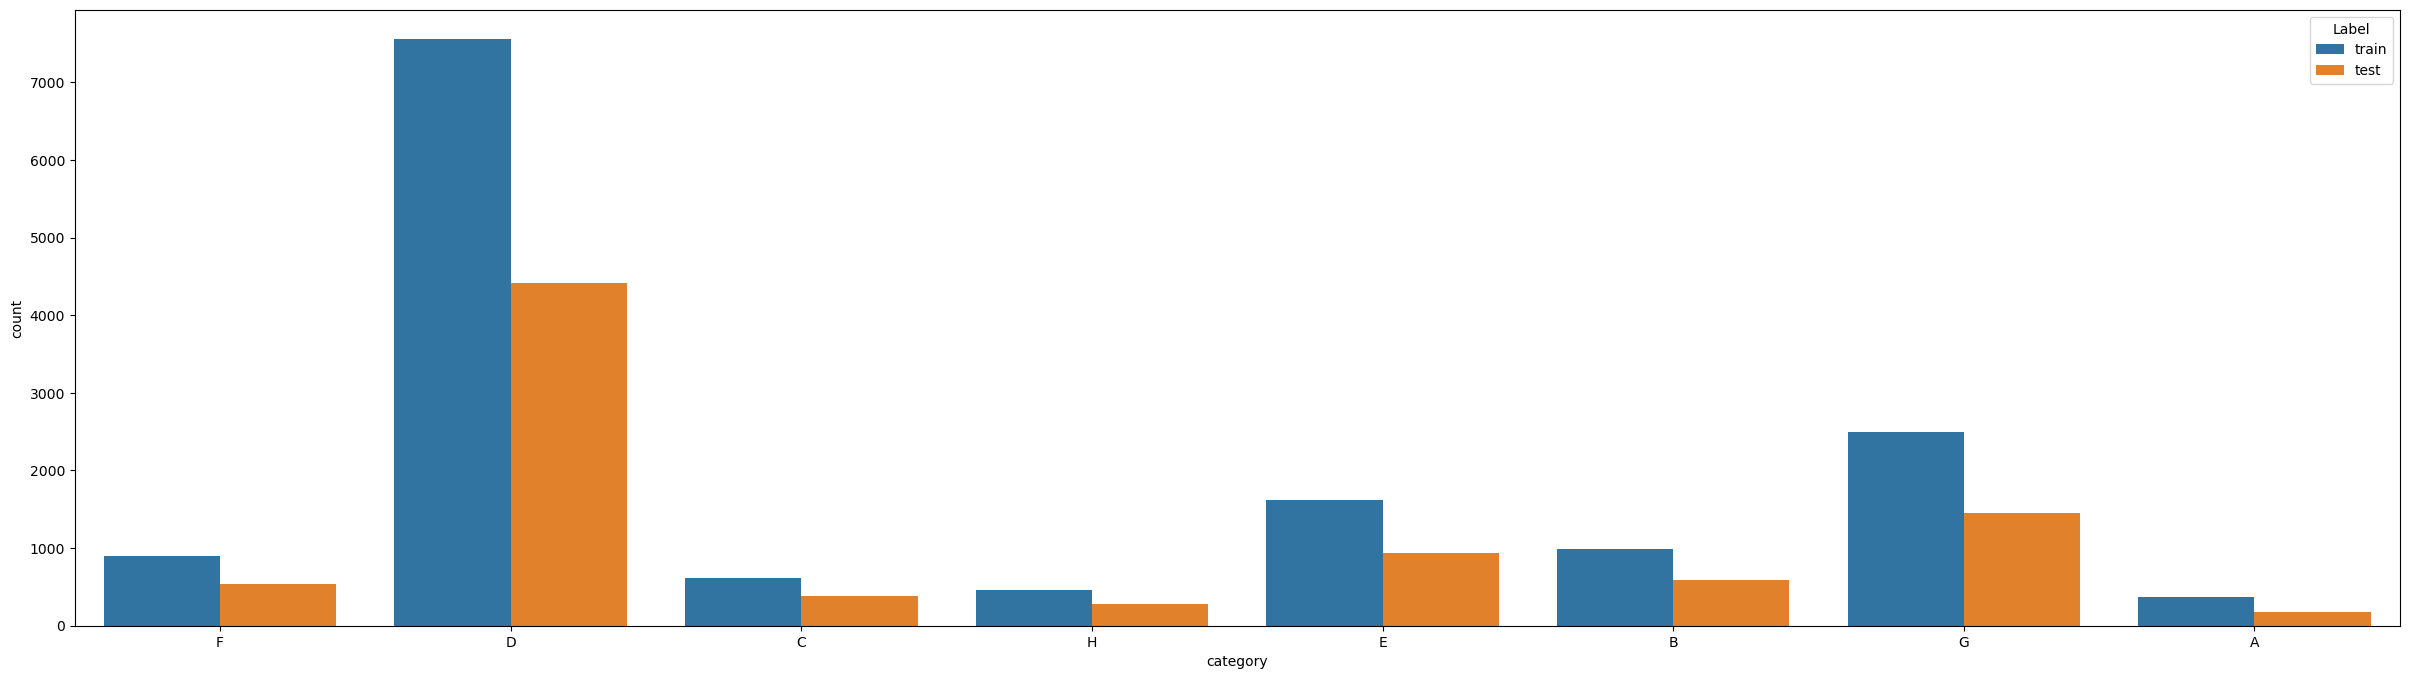

In [30]:
plt.figure(figsize=(30, 8))
sns.countplot(data = combined_df, x = 'category', hue="Label")

Above distribution shows that:

- The distribution of train and test data are similar for most categorical features.


### 4.3.7. Distribution - Target Variable

<Axes: xlabel='adview', ylabel='Density'>

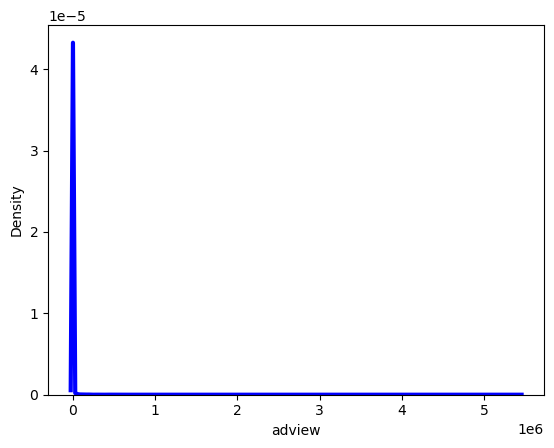

In [31]:
sns.distplot(train_df["adview"], hist = False, kde = True, kde_kws = {'linewidth': 3} ,color='b')

### 4.3.8. Data Correlation

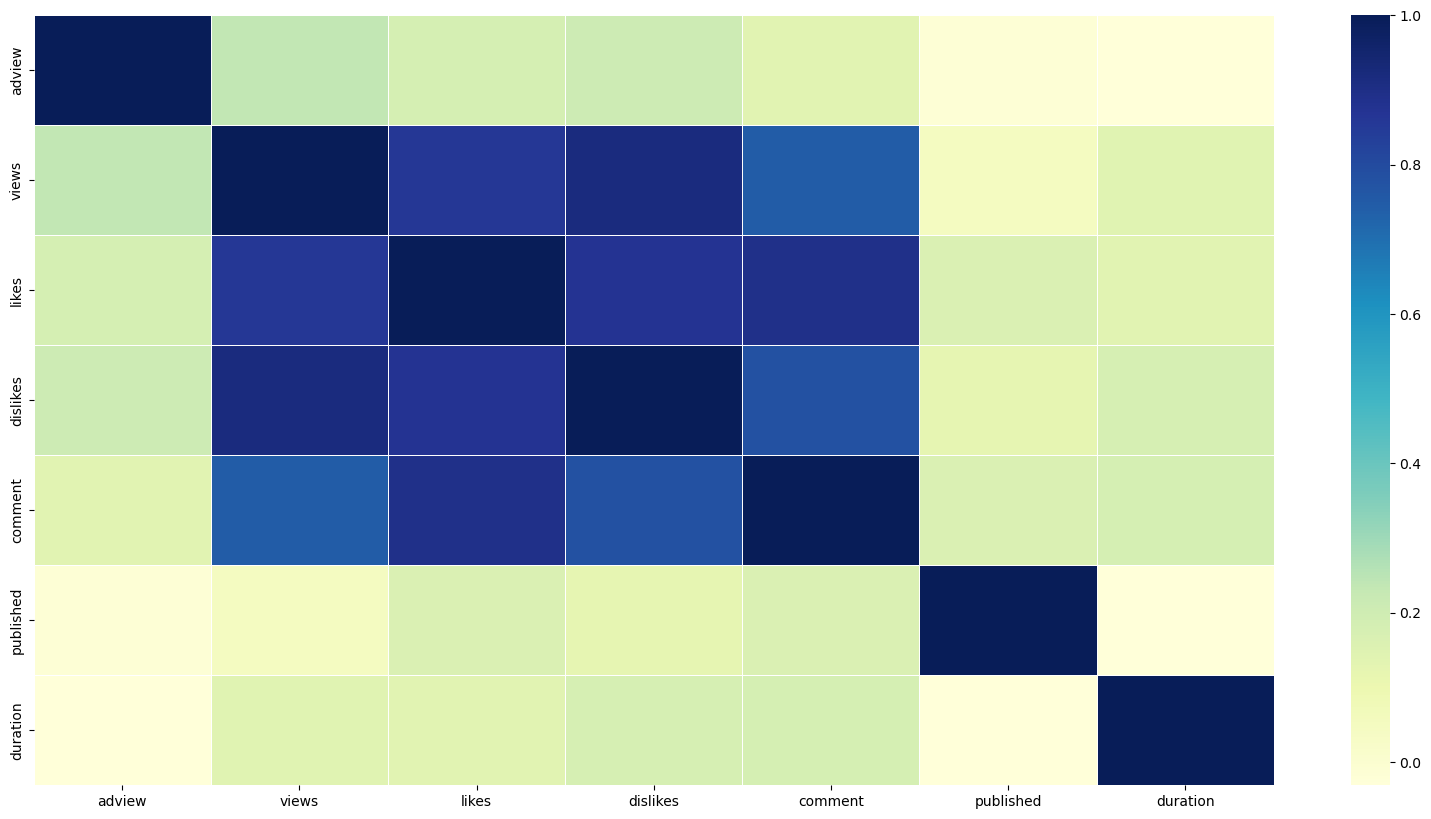

In [32]:
# Exclude rows with 'vidid' equal to 'VID_18655'
cleaned_df = train_df[train_df['vidid'] != 'VID_18655']

# Select only numeric columns for correlation calculation
numeric_columns = cleaned_df.select_dtypes(include=np.number)

# Calculate correlation matrix
training_corr = numeric_columns.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(training_corr, cmap="YlGnBu", linewidths=.5)
plt.show()

#**5. Feature Engineering**

### 5.1. Drop Columns
Here we'll drop unnecessary columns



In [33]:
drop_columns = ["vidid",'Label','published','duration']

#  Drop columns
print("Number of columns before dropping : ",len(combined_df.columns))
print("Number of dropping columns : ",len(drop_columns))
combined_df.drop(columns=drop_columns, inplace=True, errors='ignore')
print("Number of columns after dropping : ",len(combined_df.columns))


Number of columns before dropping :  10
Number of dropping columns :  4
Number of columns after dropping :  6


### 5.2. Apply PowerTransformer to columns
- We saw in distribution of continuous features that some features are not linear towards target feature. So we need to transform this. 
- Lets check the skewness of these distributions


In [34]:
# check the skew of all numerical features
skew_check_col = ['views','likes','dislikes','comment']
skewed_feats = combined_df[skew_check_col].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(7))


 Skew in numberical features: 

               Skew
views     29.926939
comment   18.761969
dislikes  18.269315
likes     11.914098


In [35]:

for col in skew_check_col:
  power = PowerTransformer(method='yeo-johnson', standardize=True)
  combined_df[[col]] = power.fit_transform(combined_df[[col]]) # fit with combined_data to avoid overfitting with training data

print('Number of skewed numerical features got transform : ', len(skew_check_col))

Number of skewed numerical features got transform :  4


### 5.7. Encoding Categorical Features

### Get-Dummies


In [36]:
# Generate one-hot dummy columns
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)


In [37]:
combined_df.head()

adview     views     likes  dislikes   comment  category_A  category_B  \
0    40.0  1.000244  1.441680  1.103359  1.398827       False       False   
1     2.0 -1.693941 -0.819659 -1.200594 -0.781064       False       False   
2     1.0 -1.641413 -1.119185 -1.747128 -1.168045       False       False   
3     6.0  0.722749  0.280058  0.723964  0.577704       False       False   
4     1.0 -1.970231 -2.009511 -1.747128 -1.679421       False       False   

   category_C  category_D  category_E  category_F  category_G  category_H  
0       False       False       False        True       False       False  
1       False        True       False       False       False       False  
2        True       False       False       False       False       False  
3       False       False       False       False       False        True  
4       False        True       False       False       False       False

In [38]:
new_train_data = combined_df.iloc[:len(train_df), :]
new_test_data = combined_df.iloc[len(train_df):, :]
X_train = new_train_data.drop('adview', axis=1)
y_train = np.log1p(new_train_data['adview'].values.ravel())
X_test = new_test_data.drop('adview', axis=1)

In [39]:
# Make Pipeline
pre_precessing_pipeline = make_pipeline(RobustScaler())

X_train = pre_precessing_pipeline.fit_transform(X_train)
X_test = pre_precessing_pipeline.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14999, 12)
(8764, 12)


# **6. Model Development**

### 6.2. Hyperparameter Tuning using Optuna

In [40]:
RANDOM_SEED = 23

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

In [41]:
def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} \nOptimized parameters: {params}")
    return params

### 6.3. Ridge Regression

In [42]:
def ridge_objective(trial):

    _alpha = trial.suggest_float("alpha", 0.1, 20)

    ridge = Ridge(alpha=_alpha, random_state=RANDOM_SEED)

    score = cross_val_score(
        ridge,X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score

# ridge_params = tune(ridge_objective)


# Best score: -1.898690687982798 
ridge_params = {'alpha': 19.99855836300504}

In [43]:
ridge = Ridge(**ridge_params, random_state=RANDOM_SEED)
ridge.fit(X_train,y_train)

Ridge(alpha=19.99855836300504, random_state=23)

### 6.4. Lasso Regression

In [44]:
def lasso_objective(trial):

    _alpha = trial.suggest_float("alpha", 0.0001, 1)

    lasso = Lasso(alpha=_alpha, random_state=RANDOM_SEED)

    score = cross_val_score(
        lasso,X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# lasso_params = tune(lasso_objective)

# Best score: -1.8987548559962844 
lasso_params =  {'alpha': 0.0009661425571276957}

In [45]:
lasso = Lasso(**lasso_params, random_state=RANDOM_SEED)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0009661425571276957, random_state=23)

### 6.5. Gradient Boosting Regressor

In [46]:
def gbr_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 20)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 20)
    _max_features = trial.suggest_int("max_features", 10, 50)

    gbr = GradientBoostingRegressor(
        n_estimators=_n_estimators,
        learning_rate=_learning_rate,
        max_depth=_max_depth, 
        max_features=_max_features,
        min_samples_leaf=_min_samples_leaf,
        min_samples_split=_min_samp_split,
        
        random_state=RANDOM_SEED,
    )

    score = cross_val_score(
        gbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score

# gbr_params = tune(gbr_objective)

# Best score: -1.8222372332051289 
gbr_params = {'n_estimators': 1396, 'learning_rate': 0.014373145732630006, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 10}

In [47]:
gbr = GradientBoostingRegressor(random_state=RANDOM_SEED, **gbr_params)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.014373145732630006, max_depth=6,
                          max_features=10, min_samples_leaf=7,
                          min_samples_split=6, n_estimators=1396,
                          random_state=23)

### 6.6. XGBRegressor 

In [48]:
def xgb_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _gamma = trial.suggest_float("gamma", 0.01, 1)
    _min_child_weight = trial.suggest_float("min_child_weight", 0.1, 10)
    _subsample = trial.suggest_float('subsample', 0.01, 1)
    _reg_alpha = trial.suggest_float('reg_alpha', 0.01, 10)
    _reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10)

    
    xgbr = xgb.XGBRegressor(
        n_estimators=_n_estimators,
        max_depth=_max_depth, 
        learning_rate=_learning_rate,
        gamma=_gamma,
        min_child_weight=_min_child_weight,
        subsample=_subsample,
        reg_alpha=_reg_alpha,
        reg_lambda=_reg_lambda,
        random_state=RANDOM_SEED,
    )
    

    score = cross_val_score(
        xgbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# xgb_params = tune(xgb_objective)

xgb_params =  {'n_estimators': 75, 'max_depth': 4, 'learning_rate': 0.27059503805300894, 
               'gamma': 0.6375378736305962, 'min_child_weight': 3.2347222003450633, 'subsample': 0.8792064649951686, 
               'reg_alpha': 8.764034303437914, 'reg_lambda': 7.475836220328881}
# Best score : -1.8258592810003325.

In [49]:
xgbr = xgb.XGBRegressor(random_state=RANDOM_SEED, **xgb_params)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.6375378736305962, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.27059503805300894,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3.2347222003450633, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=75,
             n_jobs=None, num_parallel_tree=None, random_state=23, ...)

### 6.7. LGBMRegressor

In [50]:
import lightgbm as lgb

def lgb_objective(trial):
    _num_leaves = trial.suggest_int("num_leaves", 50, 100)
    _max_depth = trial.suggest_int("max_depth", 1, 20)
    _learning_rate = trial.suggest_float("learning_rate", 0.01, 1)
    _n_estimators = trial.suggest_int("n_estimators", 50, 2000)
    _min_child_weight = trial.suggest_float("min_child_weight", 0.1, 10)
    _reg_alpha = trial.suggest_float('reg_alpha', 0.01, 10)
    _reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10)
    _subsample = trial.suggest_float('subsample', 0.01, 1)


    
    lgbr = lgb.LGBMRegressor(objective='regression',
                             num_leaves=_num_leaves,
                             max_depth=_max_depth,
                             learning_rate=_learning_rate,
                             n_estimators=_n_estimators,
                             min_child_weight=_min_child_weight,
                             subsample=_subsample,
                             reg_alpha=_reg_alpha,
                             reg_lambda=_reg_lambda,
                             random_state=RANDOM_SEED,
    )
    

    score = cross_val_score(
        lgbr, X_train,y_train, cv=kfolds, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


# lgb_params = tune(lgb_objective)

# Best score: -1.824529794158143 
lgb_params =  {'num_leaves': 84, 'max_depth': 10, 'learning_rate': 0.011076909667786489, 'n_estimators': 727, 
               'min_child_weight': 4.921109754366219, 'reg_alpha': 4.370797996109474, 'reg_lambda': 8.552921079737136, 
               'subsample': 0.4411906869457217}


In [51]:
lgbr = lgb.LGBMRegressor(objective='regression', random_state=RANDOM_SEED, **lgb_params)
lgbr.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 14999, number of used features: 12
[LightGBM] [Info] Start training from score 1.780293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(learning_rate=0.011076909667786489, max_depth=10,
              min_child_weight=4.921109754366219, n_estimators=727,
              num_leaves=84, objective='regression', random_state=23,
              reg_alpha=4.370797996109474, reg_lambda=8.552921079737136,
              subsample=0.4411906869457217)

### 6.8. StackingRegressor

In [52]:
# stack models
stack = StackingRegressor(
    estimators=[
        ('ridge', ridge),
        ('lasso', lasso),
        ('gradientboostingregressor', gbr),
        ('xgb', xgbr),
        ('lgb', lgbr),
        # ('svr', svr), # Not using this for now as its score is significantly worse than the others
    ],
    cv=kfolds)
stack.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 14999, number of used features: 12
[LightGBM] [Info] Start training from score 1.780293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

StackingRegressor(cv=KFold(n_splits=10, random_state=23, shuffle=True),
                  estimators=[('ridge',
                               Ridge(alpha=19.99855836300504, random_state=23)),
                              ('lasso',
                               Lasso(alpha=0.0009661425571276957,
                                     random_state=23)),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor(learning_rate=0.014373145732630006,
                                                         max_depth=6,
                                                         max_features=10,
                                                         min_samples_leaf=7,
                                                         min_samples_sp...
                                            multi_strategy=None,
                                            n_estimators=75, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=23, ...)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.011076909667786489,
                                             max_depth=10,
                                             min_child_weight=4.921109754366219,
                                             n_estimators=727, num_leaves=84,
                                             objective='regression',
                                             random_state=23,
                                             reg_alpha=4.370797996109474,
                                             reg_lambda=8.552921079737136,
                                             subsample=0.4411906869457217))])

### 6.9. Save the Model

In [53]:
joblib.dump(stack, "prediction_model.pkl")
model=joblib.load("prediction_model.pkl")
model

StackingRegressor(cv=KFold(n_splits=10, random_state=23, shuffle=True),
                  estimators=[('ridge',
                               Ridge(alpha=19.99855836300504, random_state=23)),
                              ('lasso',
                               Lasso(alpha=0.0009661425571276957,
                                     random_state=23)),
                              ('gradientboostingregressor',
                               GradientBoostingRegressor(learning_rate=0.014373145732630006,
                                                         max_depth=6,
                                                         max_features=10,
                                                         min_samples_leaf=7,
                                                         min_samples_sp...
                                            multi_strategy=None,
                                            n_estimators=75, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=23, ...)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.011076909667786489,
                                             max_depth=10,
                                             min_child_weight=4.921109754366219,
                                             n_estimators=727, num_leaves=84,
                                             objective='regression',
                                             random_state=23,
                                             reg_alpha=4.370797996109474,
                                             reg_lambda=8.552921079737136,
                                             subsample=0.4411906869457217))])

# **7. Find Prediction**

In [54]:
print('Predict submission')
final_test_df = pd.read_csv("test.csv")

final_test_df['AdView'] = np.round(np.expm1(model.predict(X_test))).astype(int)

final_test_df.to_csv('submission_test.csv', index=False)

Predict submission


In [55]:
final_test_df.head()
import pandas as pd

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the DataFrame
final_test_df


vidid      views   likes dislikes comment   published     duration  \
0      VID_1054     440238    6153      218    1377  2017-02-18      PT7M29S   
1     VID_18629    1040132    8171      340    1047  2016-06-28      PT6M29S   
2     VID_13967      28534      31       11       1  2014-03-10     PT37M54S   
3     VID_19442    1316715    2284      250     274  2010-06-05      PT9M55S   
4       VID_770    1893173    2519      225     116  2016-09-03       PT3M8S   
5     VID_10315     145820     215       29      19  2014-01-23     PT39M18S   
6      VID_7417      12921     169        3      73  2014-05-01      PT10M4S   
7     VID_17788       4502      65        2       8  2016-07-13      PT2M35S   
8     VID_14591     662956    1841      321     219  2014-01-13     PT13M57S   
9      VID_1228     552009    6732       97    1100  2016-08-25     PT17M49S   
10    VID_10153    1144461     592      347      28  2015-02-16       PT1H8S   
11     VID_5667     161186     371       61       7  2017-02-24     PT30M12S   
12    VID_22775      10954     243        9       3  2016-05-27      PT1M44S   
13     VID_8353       3325       9        1       0  2013-07-23      PT4M16S   
14      VID_486     105950     420       31      76  2013-01-09     PT16M54S   
15    VID_17460      22626      74        1      29  2011-12-04       PT1M5S   
16     VID_5867     121718     696       21     303  2016-07-16      PT3M56S   
17    VID_15951     322722     310       73      48  2013-10-31    PT1H21M5S   
18    VID_14890       5567      69        2       7  2015-09-22      PT1M48S   
19     VID_7219     224888    1160      126      61  2016-09-11      PT2M23S   
20    VID_20045      14698      21        5       5  2014-03-28      PT2M56S   
21    VID_11874       5677      40        7       2  2016-06-25      PT2M20S   
22     VID_1208     436827   10516      159    1237  2015-12-29      PT3M28S   
23     VID_4529     210116     583       83      25  2016-08-25      PT1M22S   
24     VID_6793     267447    7712       93    2382  2016-05-31      PT6M48S   
25    VID_18254      70260     875       18     290  2015-10-08      PT6M10S   
26    VID_11155      14364      63        0      10  2013-10-09     PT12M54S   
27    VID_12257    2728788   11290     2531    1263  2016-09-27      PT2M26S   
28     VID_4207     446002     502      128      40  2016-08-23     PT10M39S   
29    VID_23276      66000     632      122      82  2014-03-16      PT7M10S   
30    VID_18261     166437    1068      106     351  2015-12-07      PT8M20S   
31    VID_11536      32667      61       12       1  2016-01-07       PT6M6S   
32     VID_6429    1415699    2682      379     134  2014-03-31     PT15M54S   
33     VID_9277        602       1        0       0  2012-12-25       PT5M3S   
34      VID_517      48454     921       12     180  2013-06-06     PT12M52S   
35    VID_11291    1357745    7802      895    3554  2014-07-11       PT4M2S   
36    VID_11265      87951    1291       55     186  2016-11-30      PT9M41S   
37      VID_632     147069     838       25     116  2015-03-25      PT2M56S   
38    VID_13587    2607117   14078      344     578  2014-12-30      PT6M40S   
39    VID_16439      12096      36        3       0  2016-11-22        PT41S   
40    VID_14888    6865238    2068     2011     128  2015-04-27      PT2M14S   
41     VID_3207    5083221   10073     1901     681  2013-02-22     PT20M50S   
42     VID_9352      21300      98        3       5  2013-08-19       PT4M3S   
43     VID_3286     891180    1071      273      89  2013-09-03     PT17M11S   
44    VID_19592     139753     237       49      17  2016-01-24      PT2M45S   
45    VID_15582     158136     594       29      63  2014-07-09       PT2M3S   
46    VID_15269     731248     695      634      87  2015-05-12      PT2M24S   
47     VID_5703    1104151    1320       85      68  2011-12-26      PT3M19S   
48    VID_22315    3347206   24484     1150    2763  2016-05-19      PT8M16S   
49    VID_